In [1]:
#!pip install unidecode numpy cython

In [2]:
import sys

sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import clear_output
from utils_ML import *
from variables import *
clear_output(wait=False)

In [4]:
# matplotlib options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 12)

In [5]:
# Duplicate the database
#database_young = db.Database("young",pandas[pandas['AGE'] == 1].copy())
database_NONsenior = db.Database("middelage",database.data[(database.data.AGE_4 == 0)&(database.data.AGE_5 == 0)].copy())
database_senior = db.Database("senior",database.data[(database.data.AGE_4 == 1)|(database.data.AGE_5 == 1)].copy())
database_Business = db.Database("business",database.data[(database.data.BUSINESS == 1)].copy())
database_Commuter = db.Database("commuters",database.data[(database.data.COMMUTER == 1)].copy())
database_Others = db.Database("others",database.data[(database.data.BUSINESS == 0)&(database.data.COMMUTER == 0)].copy())
database_ALL = db.Database("ALL",database.data.copy())


print(f"Total number of observations: {database_ALL.getNumberOfObservations()}")
print(f"Non Senior             : {database_NONsenior.getNumberOfObservations()}")
print(f"Senior                 : {database_senior.getNumberOfObservations()}")
print(f"Commuter               : {database_Commuter.getNumberOfObservations()}")
print(f"Business                 : {database_Business.getNumberOfObservations()}")
print(f"Others                 : {database_Others.getNumberOfObservations()}")

Total number of observations: 10692
Non Senior             : 7857
Senior                 : 2835
Commuter               : 1332
Business                 : 5328
Others                 : 4032


In [6]:
#Baseline MNL linear in variables
def simulate_MNL_LPLA(scaleCostPT=1, scaleCostCAR=1, scaleHE=1):
    #Utility functions
    TRAIN_SP = ASC_TRAIN \
         + B_COST             * TRAIN_COST_SCALED * scaleCostPT\
         + B_TIME_TRAIN       * TRAIN_TT_SCALED \
         + B_HE               * TRAIN_HE_SCALED * scaleHE \
         + B_AGE_ADULTS_TRAIN * AGE_2 \
         + B_AGE_3_TRAIN      * AGE_3 \
         + B_AGE_ADULTS_TRAIN * AGE_4 \
         + B_AGE_5_TRAIN      * AGE_5 \
         + B_LUGGAGE_TRAIN    * LUGGAGE \
         + B_MALE_TRAIN       * MALE \
         + B_GA_TRAIN         * GA \
         + B_BUSINESS_TRAIN   * BUSINESS \
         + B_PRIVATE          * PRIVATE \
         + B_COMMUTER         * COMMUTER

    SM_SP = ASC_SM \
         + B_COST          * SM_COST_SCALED * scaleCostPT\
         + B_TIME_SM       * SM_TT_SCALED \
         + B_HE            * SM_HE_SCALED * scaleHE \
         + B_AGE_ADULTS_SM * AGE_2 \
         + B_AGE_ADULTS_SM * AGE_3 \
         + B_AGE_4_SM      * AGE_4 \
         + B_AGE_5_SM      * AGE_5 \
         + B_FIRST_SM      * FIRST \
         + B_BUSINESS_SM   * BUSINESS \
         + B_PRIVATE       * PRIVATE  \
         + B_COMMUTER      * COMMUTER

    Car_SP =ASC_CAR \
         + B_COST     * CAR_COST_SCALED * scaleCostCAR\
         + B_TIME_CAR * CAR_TT_SCALED



    V = {3: Car_SP,1: TRAIN_SP,2: SM_SP}
   
    return V, 'MNL_LPLA'

In [7]:
#Baseline MNL NON linear in  variables
def simulate_MNL(scaleCostPT=1, scaleCostCAR=1, scaleHE=1):
    #Utility functions
    TRAIN_SP = ASC_TRAIN \
         + B_COST             * (TRAIN_COST_SCALED * scaleCostPT)**q_COST\
         + B_TIME_TRAIN       * TRAIN_TT_SCALED                  **q_TIME \
         + B_HE               * (TRAIN_HE_SCALED * scaleHE) \
         + B_AGE_ADULTS_TRAIN * AGE_2 \
         + B_AGE_3_TRAIN      * AGE_3 \
         + B_AGE_ADULTS_TRAIN * AGE_4 \
         + B_AGE_5_TRAIN      * AGE_5 \
         + B_LUGGAGE_TRAIN    * LUGGAGE \
         + B_MALE_TRAIN       * MALE \
         + B_GA_TRAIN         * GA \
         + B_BUSINESS_TRAIN   * BUSINESS \
         + B_PRIVATE          * PRIVATE \
         + B_COMMUTER         * COMMUTER

    SM_SP = ASC_SM \
         + B_COST          * (SM_COST_SCALED * scaleCostPT)**q_COST\
         + B_TIME_SM       * SM_TT_SCALED                  **q_TIME \
         + B_HE            * (SM_HE_SCALED * scaleHE) \
         + B_AGE_ADULTS_SM * AGE_2 \
         + B_AGE_ADULTS_SM * AGE_3 \
         + B_AGE_4_SM      * AGE_4 \
         + B_AGE_5_SM      * AGE_5 \
         + B_FIRST_SM      * FIRST \
         + B_BUSINESS_SM   * BUSINESS \
         + B_PRIVATE       * PRIVATE  \
         + B_COMMUTER      * COMMUTER

    Car_SP = ASC_CAR \
         + B_COST     * (CAR_COST_SCALED * scaleCostCAR)**q_COST\
         + B_TIME_CAR * CAR_TT_SCALED                   **q_TIME



    V = {3: Car_SP,1: TRAIN_SP,2: SM_SP}
    
    return V, 'MNL'

In [8]:
#MMNL
def simulate_MMNL(scaleCostPT=1, scaleCostCAR=1, scaleHE=1):
    #Utility functions
    TRAIN_SP = ASC_TRAIN \
         + BETA_COST_random_Norm             * (TRAIN_COST_SCALED * scaleCostPT)**q_COST \
         + BETA_TIME_TRAIN_random_Norm       * TRAIN_TT_SCALED \
         + BETA_HE_random_Norm               * (TRAIN_HE_SCALED * scaleHE)      **q_HE \
         + B_AGE_ADULTS_TRAIN * AGE_2 \
         + B_AGE_3_TRAIN      * AGE_3 \
         + B_AGE_ADULTS_TRAIN * AGE_4 \
         + B_AGE_5_TRAIN      * AGE_5 \
         + B_LUGGAGE_TRAIN    * LUGGAGE \
         + B_MALE_TRAIN       * MALE \
         + B_GA_TRAIN         * GA \
         + B_BUSINESS_TRAIN   * BUSINESS \
         + B_PRIVATE          * PRIVATE  \
         + B_COMMUTER         * COMMUTER

    SM_SP = ASC_SM \
         + BETA_COST_random_Norm * (SM_COST_SCALED * scaleCostPT)**q_COST \
         + B_TIME_SM       * SM_TT_SCALED \
         + B_HE            * (SM_HE_SCALED * scaleHE)            **q_HE   \
         + B_AGE_ADULTS_SM * AGE_2 \
         + B_AGE_ADULTS_SM * AGE_3 \
         + B_AGE_4_SM      * AGE_4 \
         + B_AGE_5_SM      * AGE_5 \
         + B_FIRST_SM      * FIRST \
         + B_BUSINESS_SM   * BUSINESS \
         + B_PRIVATE       * PRIVATE \
         + B_COMMUTER      * COMMUTER

    Car_SP = ASC_CAR \
         + BETA_COST_random_Norm     * (CAR_COST_SCALED * scaleCostCAR)**q_COST \
         + BETA_TIME_CAR_random_Norm * CAR_TT_SCALED



    V = {3: Car_SP,1: TRAIN_SP,2: SM_SP}
    
    return V, 'MMNL'

In [9]:
#MMNLnoPa
def simulate_MMNLnoPa(scaleCostPT=1, scaleCostCAR=1, scaleHE=1):
    #Utility functions
    TRAIN_SP = ASC_TRAIN                                      + \
         BETA_COST_random             * (TRAIN_COST_SCALED * scaleCostPT)**q_COST + \
         BETA_TIME_TRAIN_random_Norm       * TRAIN_TT_SCALED**q_TIME   + \
         BETA_HE_random_Norm               * (TRAIN_HE_SCALED * scaleHE)           + \
         B_AGE_ADULTS_TRAIN * AGE_2                     + \
         B_AGE_3_TRAIN      * AGE_3                     + \
         B_AGE_ADULTS_TRAIN * AGE_4                     + \
         B_AGE_5_TRAIN      * AGE_5                     + \
         B_LUGGAGE_TRAIN    * LUGGAGE                   + \
         B_MALE_TRAIN       * MALE                      + \
         B_GA_TRAIN         * GA                        + \
         B_BUSINESS_TRAIN   * BUSINESS                  + \
         B_PRIVATE          * PRIVATE                   + \
         B_COMMUTER         * COMMUTER

    SM_SP = ASC_SM                                   + \
         BETA_COST_random * (SM_COST_SCALED * scaleCostPT)**q_COST + \
         BETA_TIME_SM_random       * SM_TT_SCALED**q_TIME   + \
         BETA_HE_random_Norm            * (SM_HE_SCALED * scaleHE)           + \
         B_AGE_ADULTS_SM * AGE_2                  + \
         B_AGE_ADULTS_SM * AGE_3                  + \
         B_AGE_4_SM      * AGE_4                  + \
         B_AGE_5_SM      * AGE_5                  + \
         B_FIRST_SM      * FIRST                  + \
         B_BUSINESS_SM   * BUSINESS               + \
         B_PRIVATE       * PRIVATE                + \
         B_COMMUTER      * COMMUTER

    Car_SP = ASC_CAR                              + \
         BETA_COST_random     * (CAR_COST_SCALED * scaleCostCAR)**q_COST + \
         B_TIME_CAR * CAR_TT_SCALED**q_TIME



    V = {3: Car_SP,1: TRAIN_SP,2: SM_SP}
    
    return V, 'noPa'

In [10]:
# Function that calculates the market shares for SM for a given scaling of the cost

def scenario(model, database, pickShare, scaleCostPT = 1, scaleCostCAR = 1, HE_scale = 1, draws=100):
    '''
    ...#costScale includes the variability of cost
    ...#HEvalue the simulations on different HE values
    ...#To test HE effect in conditions similar to Train, 
    ...#we put SM_TT_SCALED = TRAIN_TT_SCALED
    '''
    share = {'CAR': 3,'TRAIN': 1,'SM': 2}
    
    
    
    if model == 'MMNL':
        utilitySpecification = simulate_MMNL
        results = res.bioResults(pickleFile='../finalModels/ML_14.pickle')
    
    elif model == 'MMNLnoPa':
        utilitySpecification = simulate_MMNL
        results = res.bioResults(pickleFile='../finalModels/ML_16.pickle')
    
    
    elif model == 'MNL_LPLA':
        utilitySpecification = simulate_MNL_LPLA
        results = res.bioResults(pickleFile='../finalModels/ML_1~60.pickle')
    
    elif model == 'MNL':
        utilitySpecification = simulate_MNL
        results = res.bioResults(pickleFile='../finalModels/ML_2~53.pickle')

    V, model = utilitySpecification(scaleCostPT=scaleCostPT, scaleCostCAR=scaleCostCAR, scaleHE=HE_scale)
    # Extract the values that are necessary
    betaValues = results.getBetaValues()
    #print(len(betaValues))
    av = {3: CAR_AV_SP,1: TRAIN_AV_SP,2: SM_AV}
    
    #Lets Look at CARs market share
    prob_PS = models.logit(V,av,share[pickShare])
    
    if model in ['MMNL', 'MMNLnoPa']: 
        prob = MonteCarlo(prob_PS)
    else:
        prob = prob_PS
    simulate = {'Prob. PS': prob}
    
    biosim  = bio.BIOGEME(database,simulate,numberOfDraws=draws)
    
    biosim.modelName = f"marketShares_{pickShare}_{model}"
    
    simresults = biosim.simulate(betaValues)
    
    return simresults['Prob. PS'].mean()

In [11]:
def plot3Dmarketshares(printStuff, HE_scale, scaleCost, i,j,k, minMS=0.0, maxMS=0.4,save=False):
    
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(HE_scale, scaleCost)
    
    
    for sh in printStuff: 
        z = np.array(sh)
        Z = z.reshape(X.shape)
        ax.plot_surface(X, Y, Z,cmap=cm.coolwarm, rstride=8, cstride=8, alpha=0.3
                        #, label='All'
                       )
        cset = ax.contourf(X, Y, Z, zdir='z', offset=minMS, cmap=cm.coolwarm)
        cset = ax.contourf(X, Y, Z, zdir='x', offset=min(HE_scale),cmap=cm.coolwarm)
        cset = ax.contourf(X, Y, Z, zdir='y', offset=max(scaleCost), cmap=cm.coolwarm)


    ax.set_xlabel('Public Transport HE % Variation')
    ax.set_xlim(min(HE_scale), max(HE_scale))
    ax.set_ylabel('Public Transport Cost % Variation')
    ax.set_ylim(min(scaleCost), max(scaleCost))
    ax.set_zlabel('CAR Market Shares')
    ax.set_zlim(minMS, maxMS)
    if save:
        plt.savefig(f'3D-{ModLabels[i]}-{j}-{k}', dpi=300)
    plt.show()

In [12]:
def plot2Dmarketshares(printStuff, HE_scale, scaleCost, i,j,k, minMS=0.1, maxMS=0.5,save=False, font_size=12):
    
    MM=len(HE_scale)-1
    me=(len(HE_scale)-1)//2
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colormap=['b','g','r']
    linemap=['-','--','*-']
    
    if len(printStuff)==1:
        labelDataset = ['All']
        ax.set_title(f'{ModLabels[i]}-IMPACT of Public Transportation policies ON CAR market share \n HE and cost policy bonduaries for SM and Train \n effects on {labelDataset[0]}')
        ax.plot(scaleCost, CAR_MS_tot_abs*np.ones(len(scaleCost)), linemap[0], c='black', label='All')
    
    elif len(printStuff)==2:
        labelDataset = ['senior', 'NONsenior']
        ax.set_title(f'{ModLabels[i]}-IMPACT of Public Transportation policies ON CAR market share \n HE and cost policy bonduaries for SM and Train \n effects on {labelDataset[0]} Vs {labelDataset[1]}')
        ax.plot(scaleCost, senior_MS_rel*np.ones(len(scaleCost)), linemap[0], c='black', label='zero-Senior')
        ax.plot(scaleCost, NON_senior_MS_rel*np.ones(len(scaleCost)), linemap[1], c='black', label='zero-non-Senior')
        
    else:
        labelDataset =['Business', 'Commuter', 'Others']
        ax.set_title(f'{ModLabels[i]}-IMPACT of Public Transportation policies ON CAR market share \n HE and cost policy bonduaries for SM and Train \n effects on {labelDataset[0]} Vs. {labelDataset[1]} Vs. {labelDataset[2]}')
        ax.plot(scaleCost, Business_MS_rel*np.ones(len(scaleCost)), linemap[0], c='black', label='zero-Business')
        ax.plot(scaleCost, Commuter_MS_rel*np.ones(len(scaleCost)), linemap[1], c='black', label='zero-Commuter')
        ax.plot(scaleCost, Others_MS_rel*np.ones(len(scaleCost)), linemap[2], c='black', label='zero-Others')
        
    for ii, sh in enumerate(printStuff):
        sh = np.array(sh).reshape(len(HE_scale),len(scaleCost))
        
        ax.plot(scaleCost, sh[MM,:], linemap[ii], c=colormap[2], label=str(labelDataset[ii])+'-HE='+str(100*HE_scale[MM])+'%')
        ax.plot(scaleCost, sh[me,:], linemap[ii], c=colormap[1], label=str(labelDataset[ii])+'-HE='+str(100*HE_scale[me])+'%')
        ax.plot(scaleCost, sh[0,:], linemap[ii], c=colormap[0],label=str(labelDataset[ii])+'-HE='+str(100*HE_scale[0])+'%')
        


    plt.axvline(x=1, c='black', label='cost 100% as from survey results')

    ax.legend(fontsize=font_size)
    ax.set_xlabel('Cost variation on both Public Transport (Train and SM: the actual cost 1=100%)', fontsize=font_size)
    ax.set_xlim(min(scaleCost), max(scaleCost))
    ax.set_ylabel('CAR Market Share', fontsize=font_size)
    ax.set_ylim(minMS, maxMS)
    if save:
        plt.savefig(f'2D-{ModLabels[i]}-{j}-{k}', dpi=300)
    plt.show()

In [13]:
CAR_MS_tot_abs=database.data.CHOICE[(database.data.CHOICE==3)].count()/database.data.CHOICE.count()
#
senior_MS_rel = database.data.CHOICE[(database.data.CHOICE==3) & ((database.data.AGE_4 == 1)|(database.data.AGE_5 == 1))].count()/database.data.CHOICE[((database.data.AGE_4 == 1)|(database.data.AGE_5 == 1))].count()
senior_MS_abs = database.data.CHOICE[(database.data.CHOICE==3) & ((database.data.AGE_4 == 1)|(database.data.AGE_5 == 1))].count()/database.data.CHOICE.count()
#
NON_senior_MS_rel = database.data.CHOICE[(database.data.CHOICE==3) & (((database.data.AGE_2 == 0)&(database.data.AGE_3 == 0)&(database.data.AGE_4 == 0)&(database.data.AGE_5 == 0))|(database.data.AGE_2 == 1)|(database.data.AGE_3 == 1))].count()/database.data.CHOICE[(((database.data.AGE_2 == 0)&(database.data.AGE_3 == 0)&(database.data.AGE_4 == 0)&(database.data.AGE_5 == 0))|(database.data.AGE_2 == 1)|(database.data.AGE_3 == 1))].count()
NON_senior_MS_abs = database.data.CHOICE[(database.data.CHOICE==3) & (((database.data.AGE_2 == 0)&(database.data.AGE_3 == 0)&(database.data.AGE_4 == 0)&(database.data.AGE_5 == 0))|(database.data.AGE_2 == 1)|(database.data.AGE_3 == 1))].count()/database.data.CHOICE.count()
#
Business_MS_rel = database.data.CHOICE[(database.data.CHOICE==3) & (database.data.BUSINESS == 1)].count()/database.data.CHOICE[(database.data.BUSINESS == 1)].count()
Commuter_MS_rel = database.data.CHOICE[(database.data.CHOICE==3) & (database.data.COMMUTER == 1)].count()/database.data.CHOICE[(database.data.COMMUTER == 1)].count()
Others_MS_rel = database.data.CHOICE[(database.data.CHOICE==3) & (((database.data.BUSINESS == 0)&(database.data.COMMUTER==0)))].count()/database.data.CHOICE[(((database.data.BUSINESS == 0)&(database.data.COMMUTER==0)))].count()
#
Business_MS_abs = database.data.CHOICE[(database.data.CHOICE==3) & (database.data.BUSINESS == 1)].count()/database.data.CHOICE.count()
Commuter_MS_abs = database.data.CHOICE[(database.data.CHOICE==3) & (database.data.COMMUTER == 1)].count()/database.data.CHOICE.count()
Others_MS_abs = database.data.CHOICE[(database.data.CHOICE==3) & (((database.data.BUSINESS == 0)&(database.data.COMMUTER==0)))].count()/database.data.CHOICE.count()
#


    
PURPOSE_dbs =[database_Business, database_Commuter, database_Others]
AGE_dbs = [database_senior, database_NONsenior]
FULL_dbs = [database_ALL]
ModLabels =['MNL_LPLA','MNL','MMNLnoPa','MMNL']
#scales = np.arange(0.95,1.05,0.01)
#HEs = np.arange(0.95,1.05,0.01)

# Variation of HE and Public Transport Cost

(11,) (11,)


## MNL_LPLA-Segmentation-0

0 (10692, 48)
(1, 121)


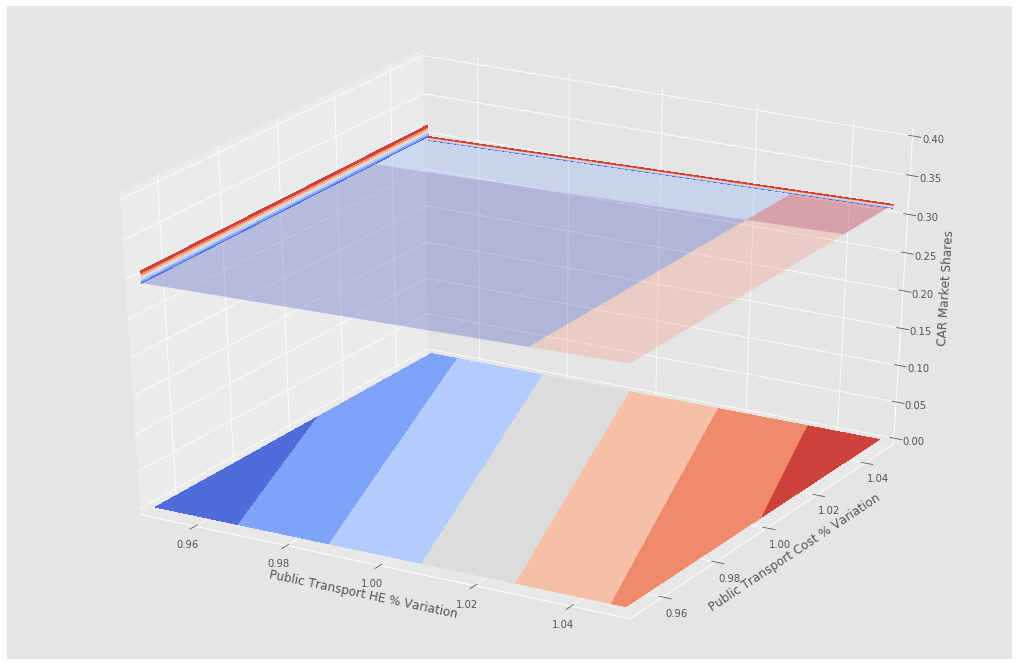

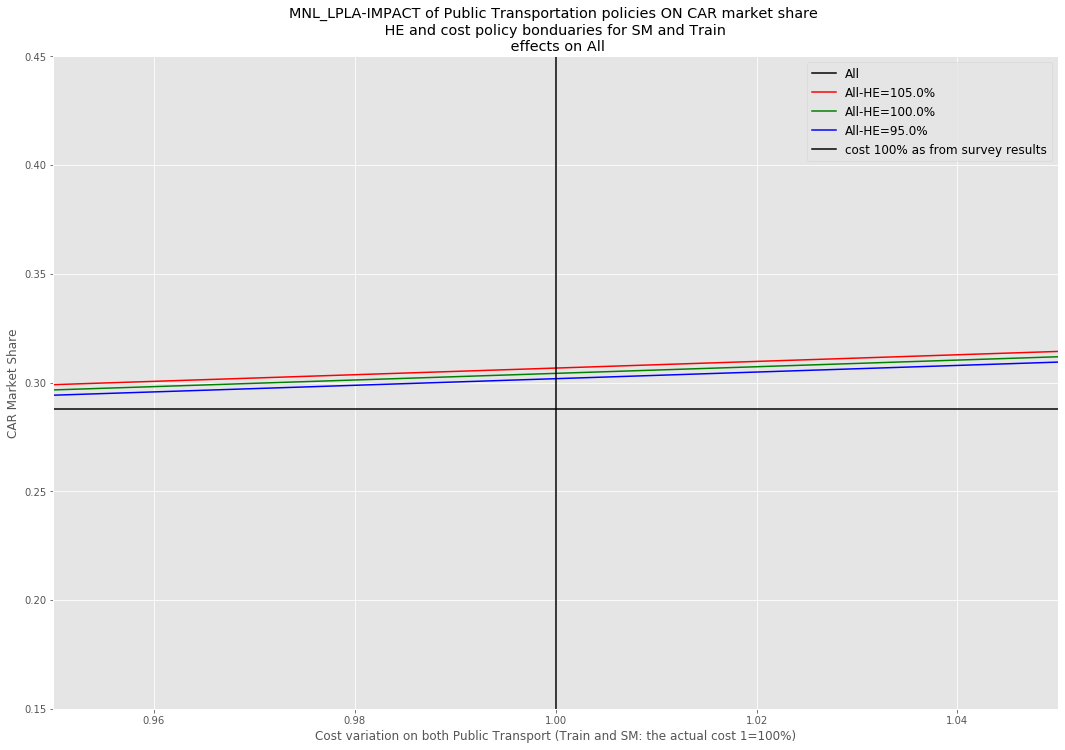

## MNL-Segmentation-0

0 (10692, 48)
(1, 121)


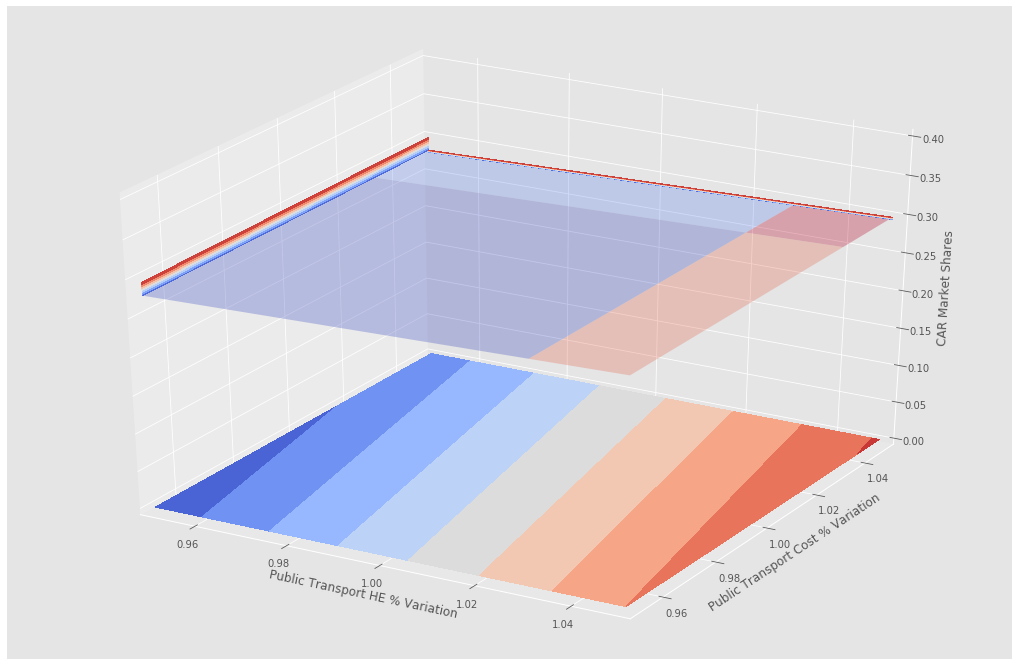

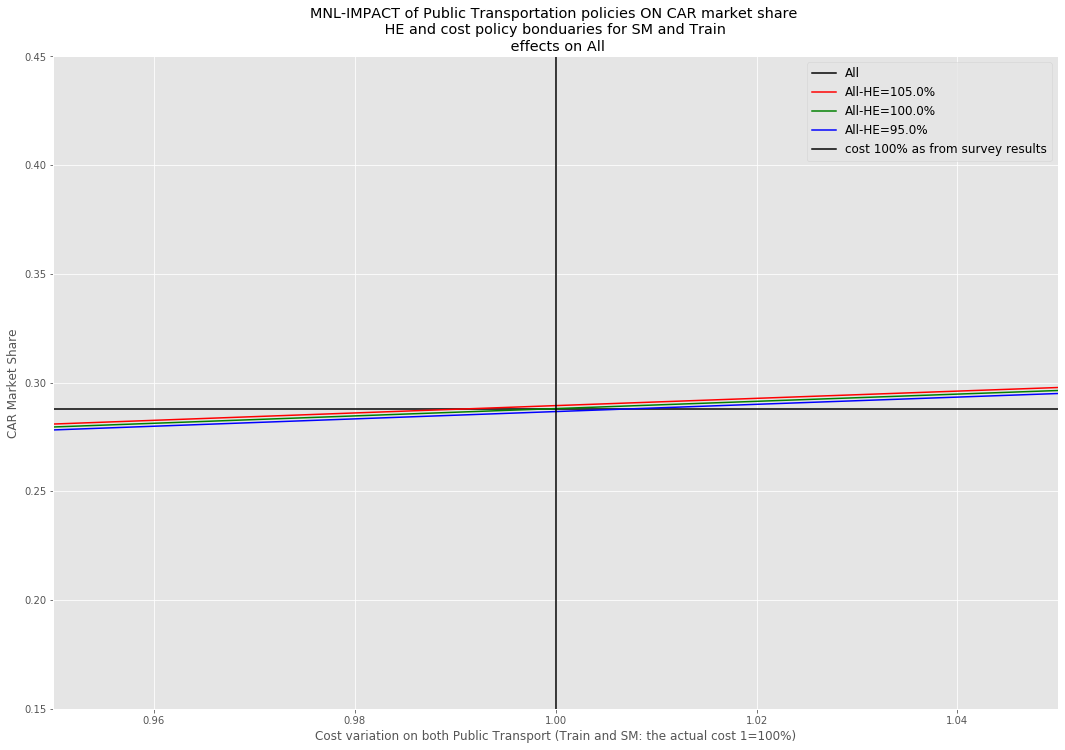

## MMNLnoPa-Segmentation-0

0 (10692, 48)
(1, 121)


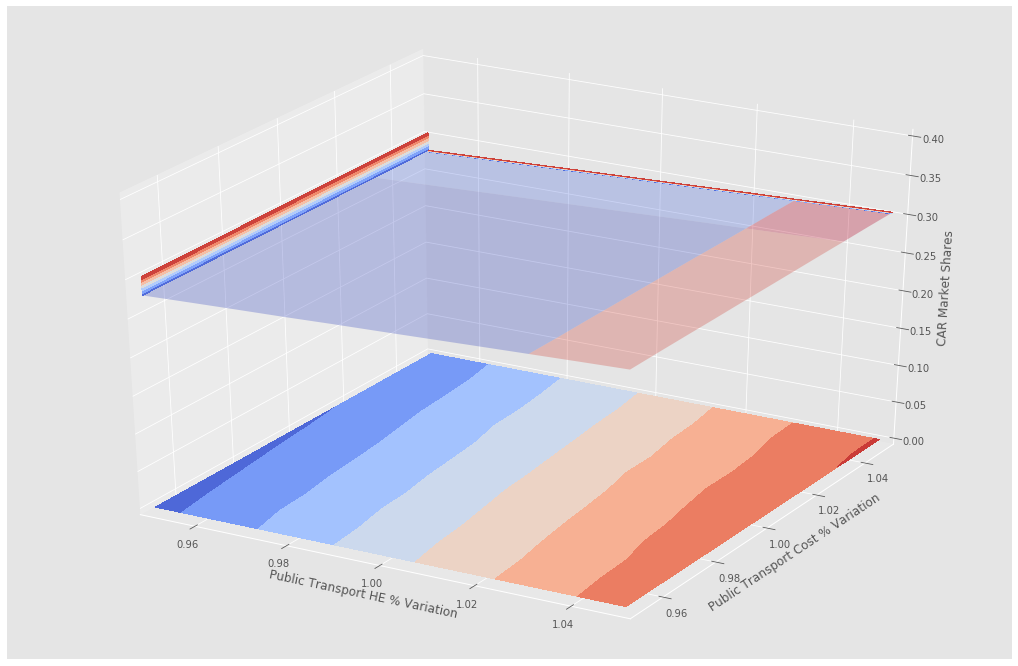

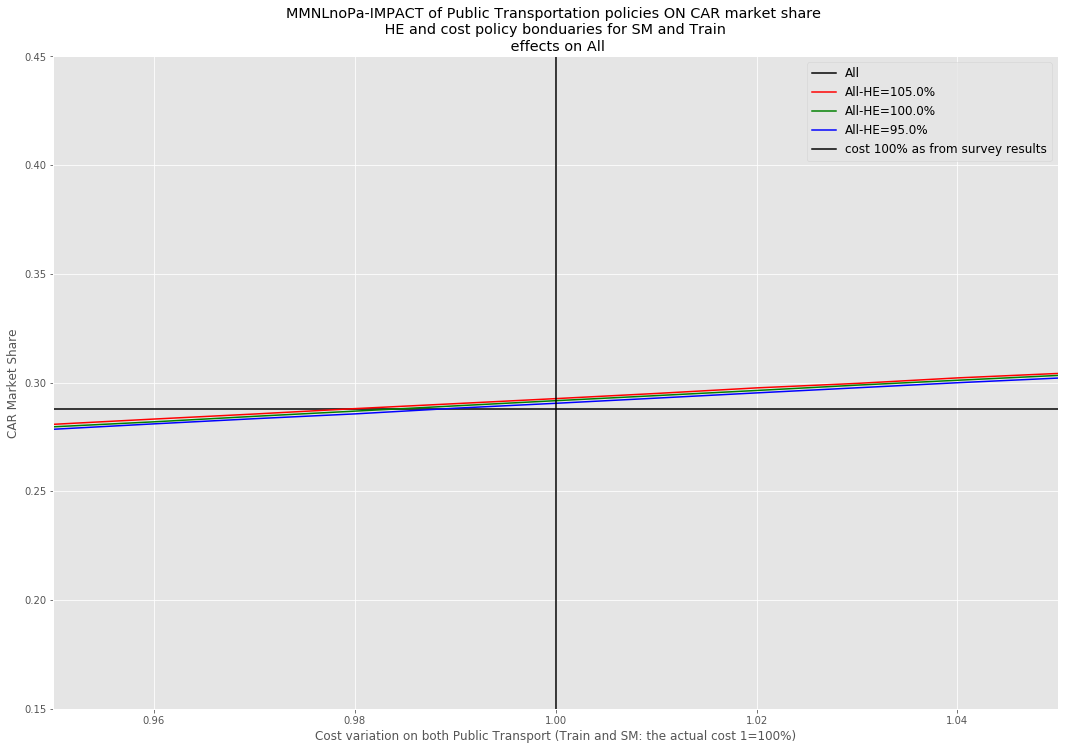

## MMNL-Segmentation-0

0 (10692, 48)
(1, 121)


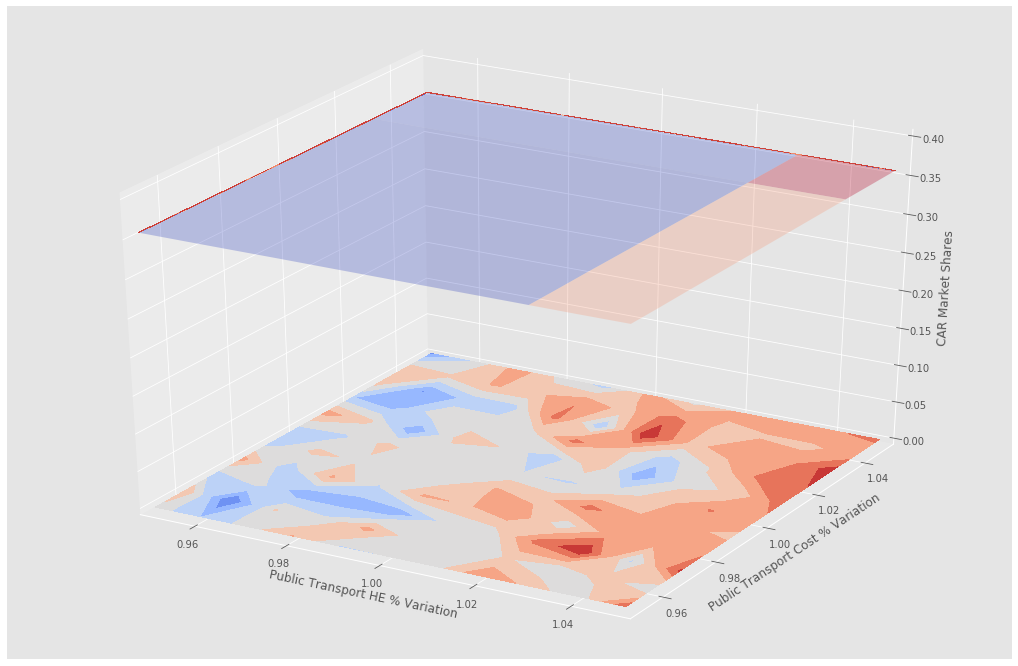

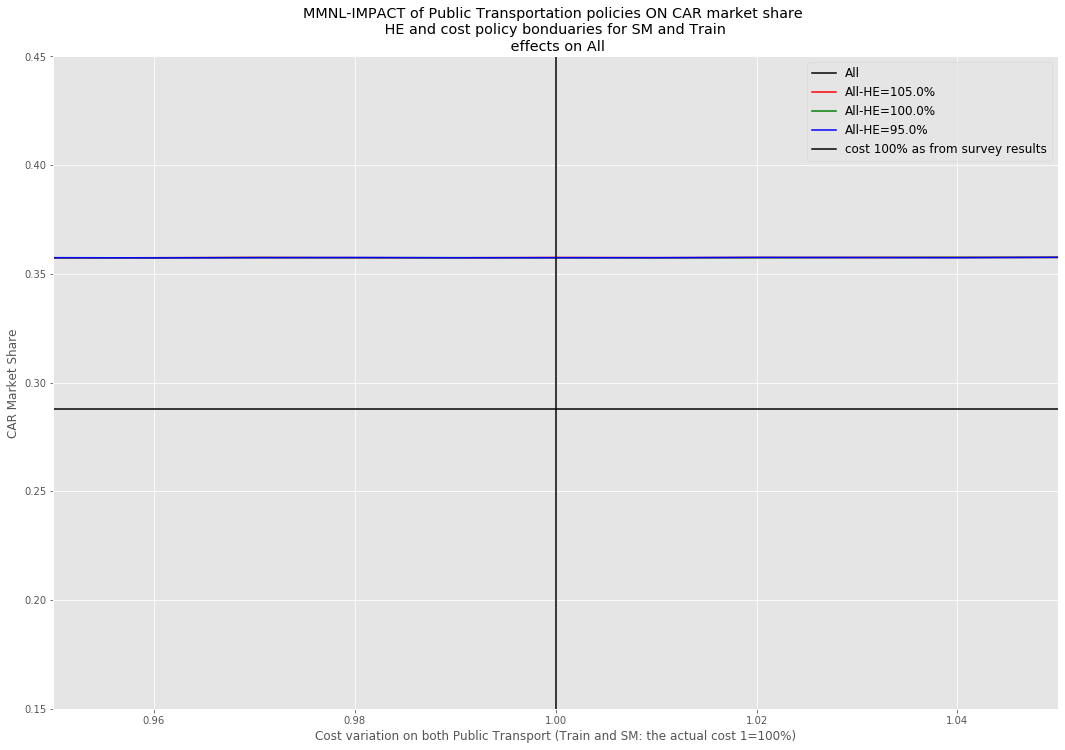

## MNL_LPLA-Segmentation-1

0 (5328, 48)
(1, 121)
1 (1332, 48)
(1, 121)
2 (4032, 48)
(1, 121)


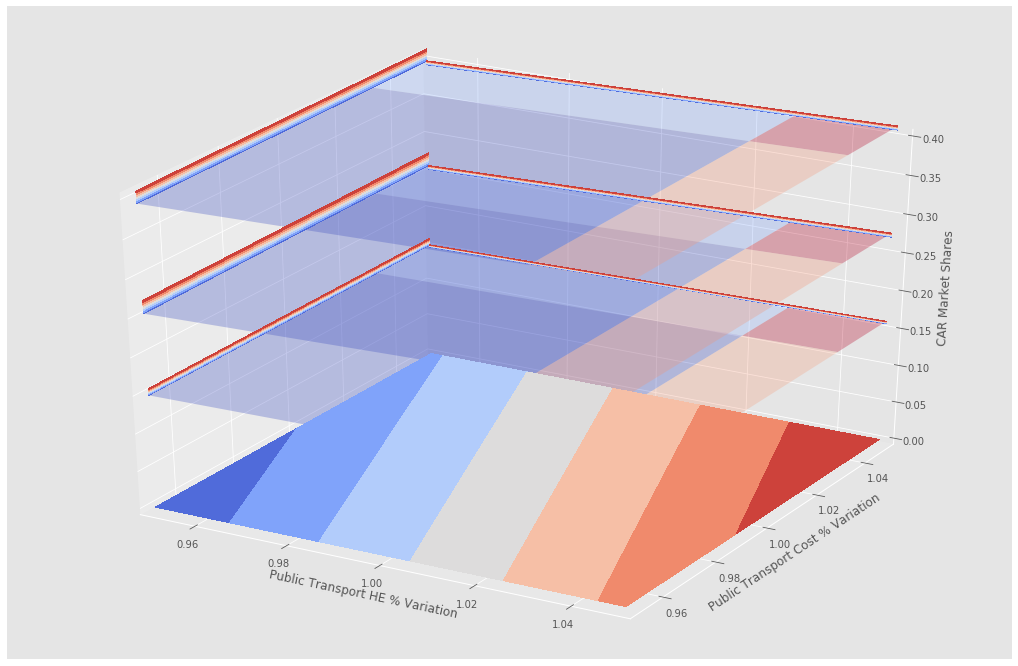

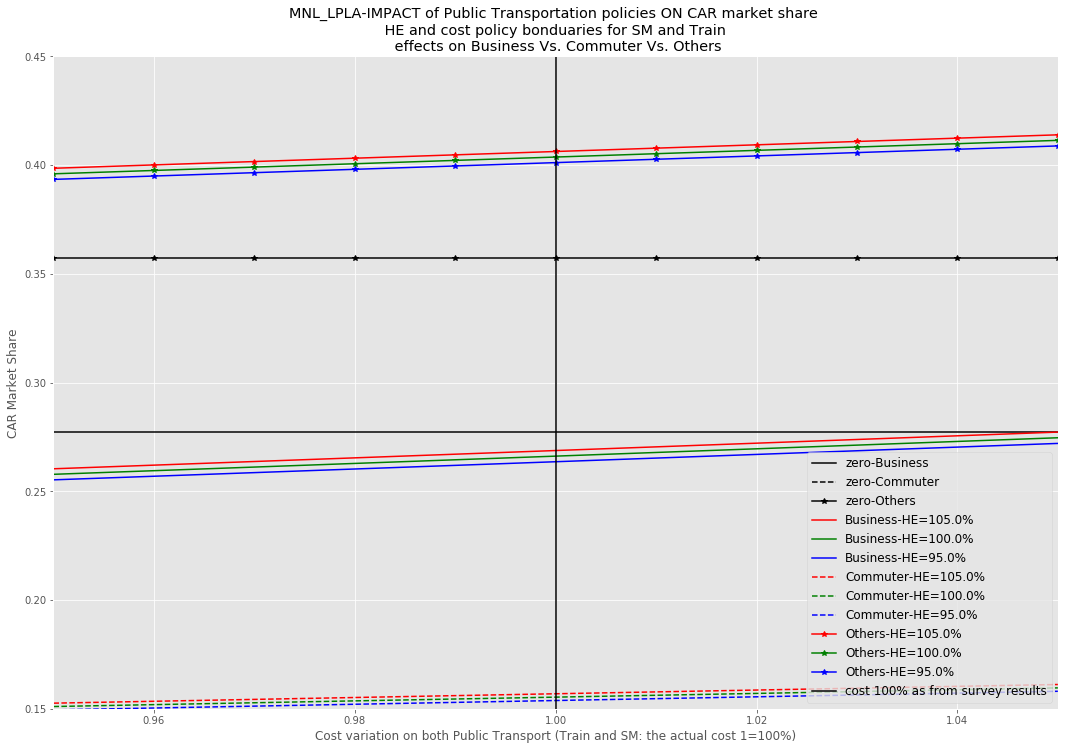

## MNL-Segmentation-1

0 (5328, 48)
(1, 121)
1 (1332, 48)
(1, 121)
2 (4032, 48)
(1, 121)


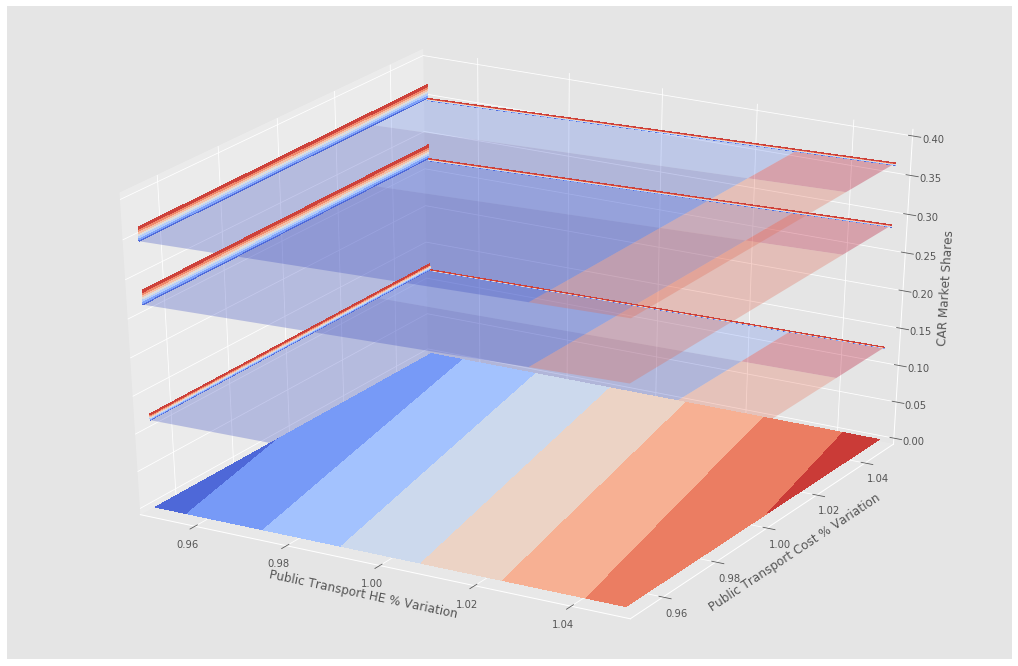

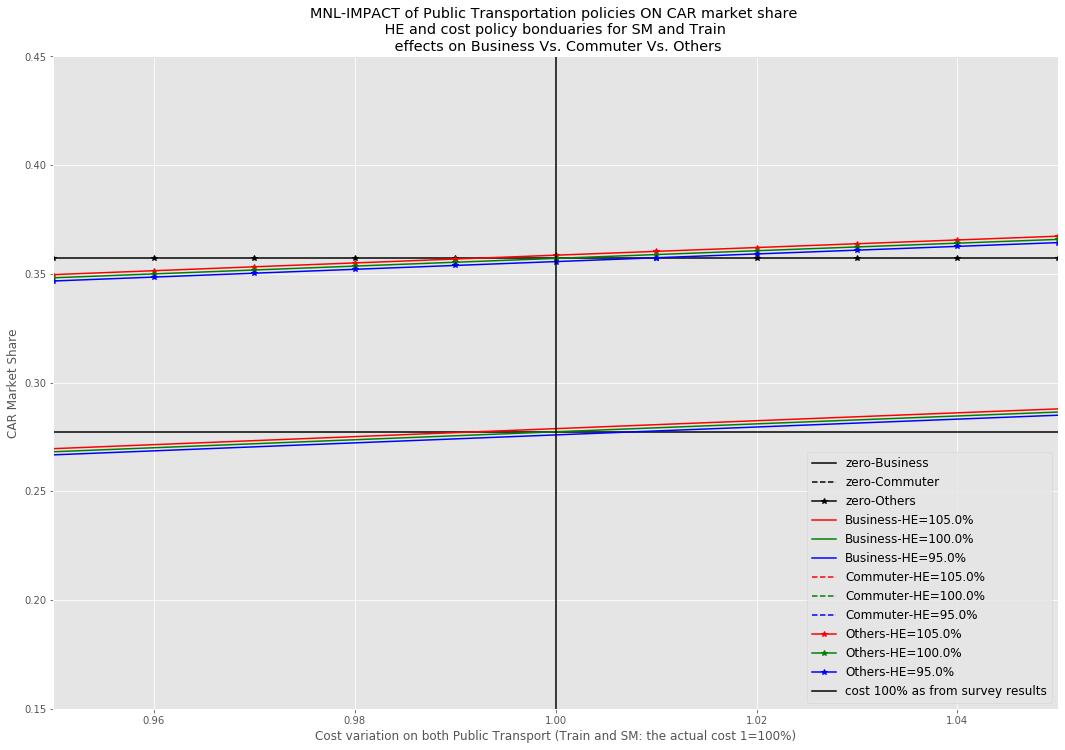

## MMNLnoPa-Segmentation-1

0 (5328, 48)
(1, 121)
1 (1332, 48)
(1, 121)
2 (4032, 48)
(1, 121)


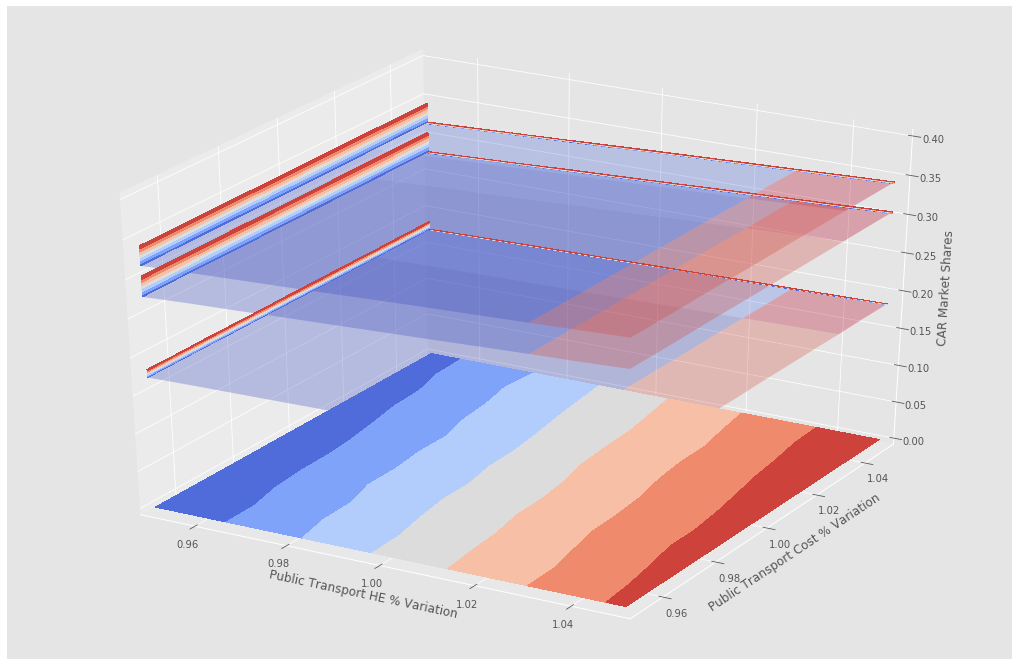

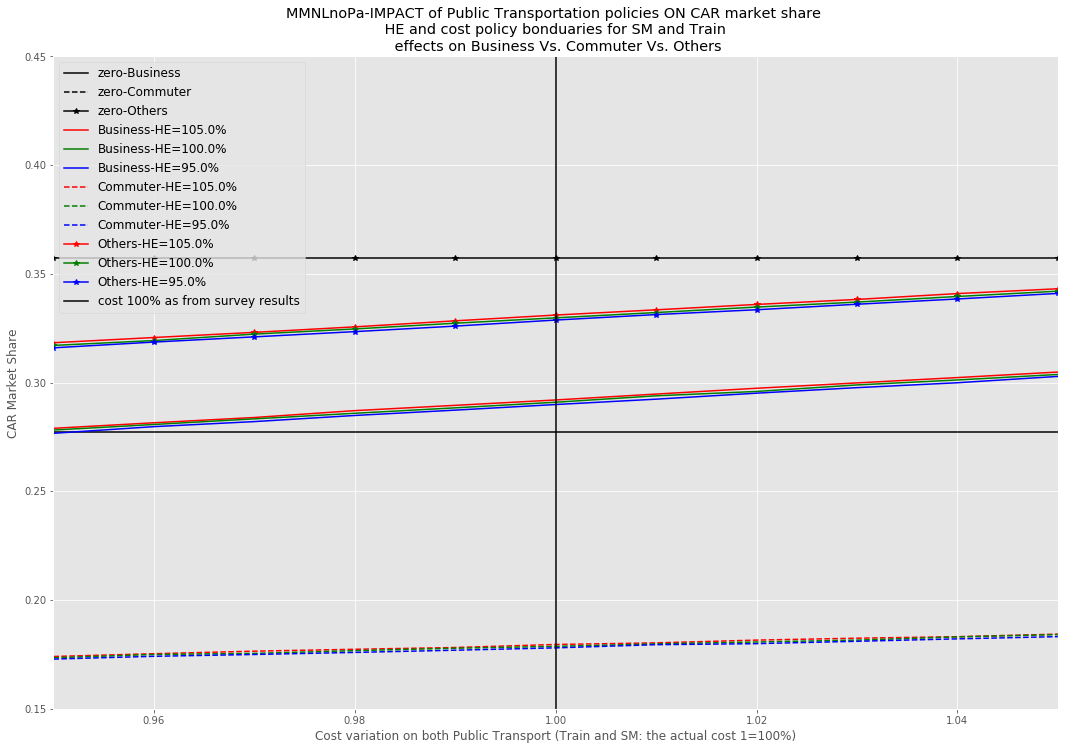

## MMNL-Segmentation-1

0 (5328, 48)
(1, 121)
1 (1332, 48)
(1, 121)
2 (4032, 48)
(1, 121)


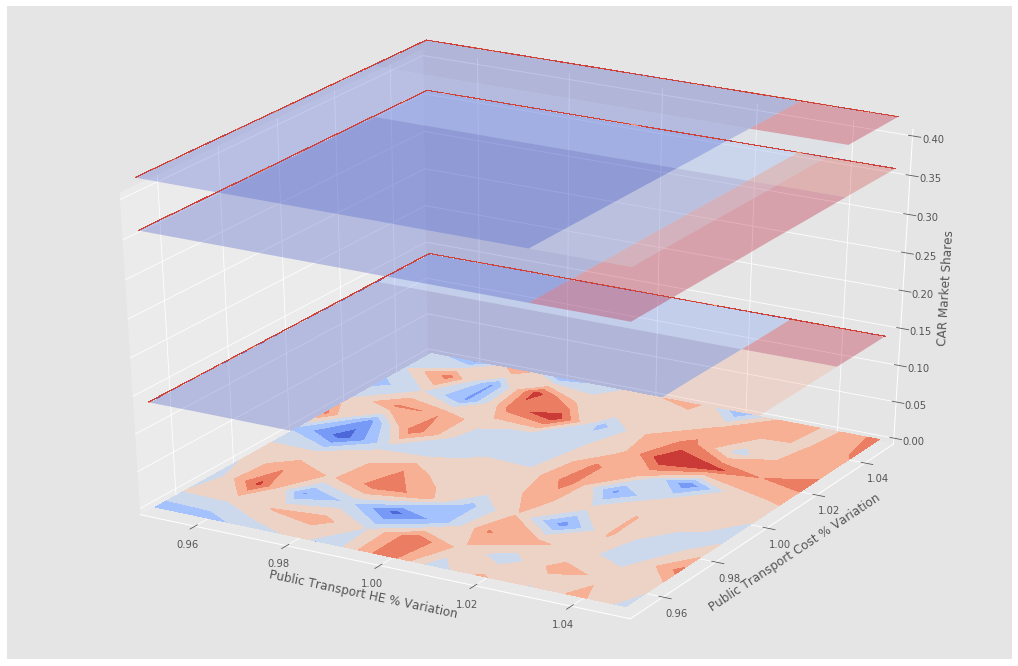

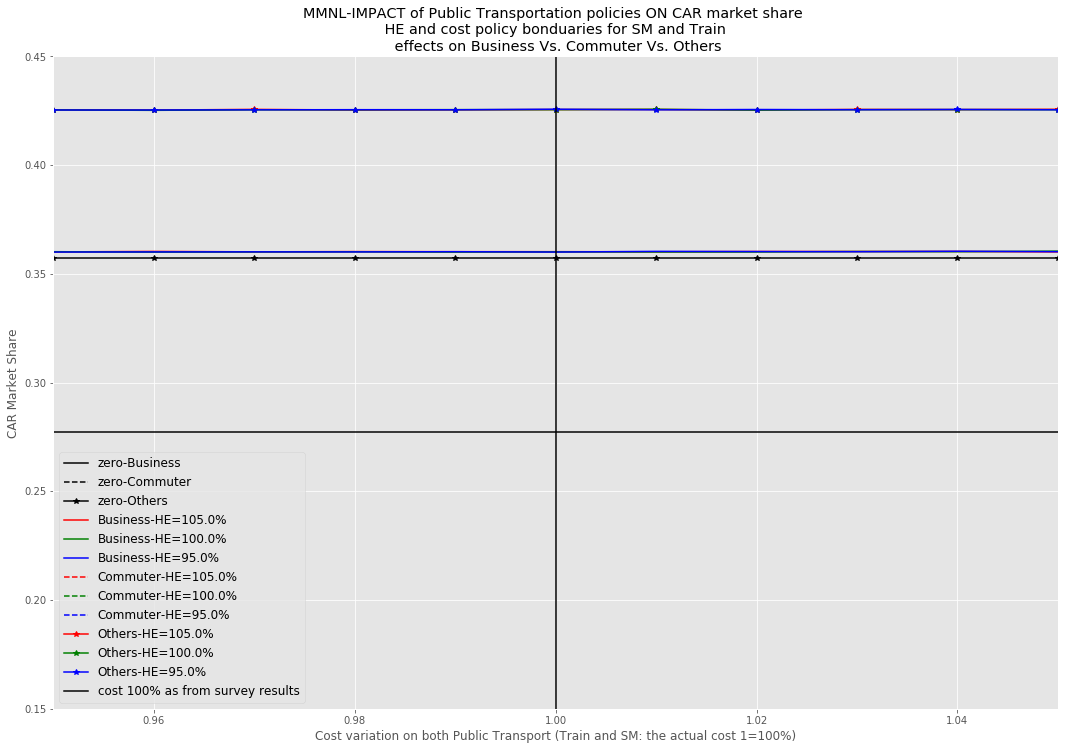

## MNL_LPLA-Segmentation-2

0 (2835, 48)
(1, 121)
1 (7857, 48)
(1, 121)


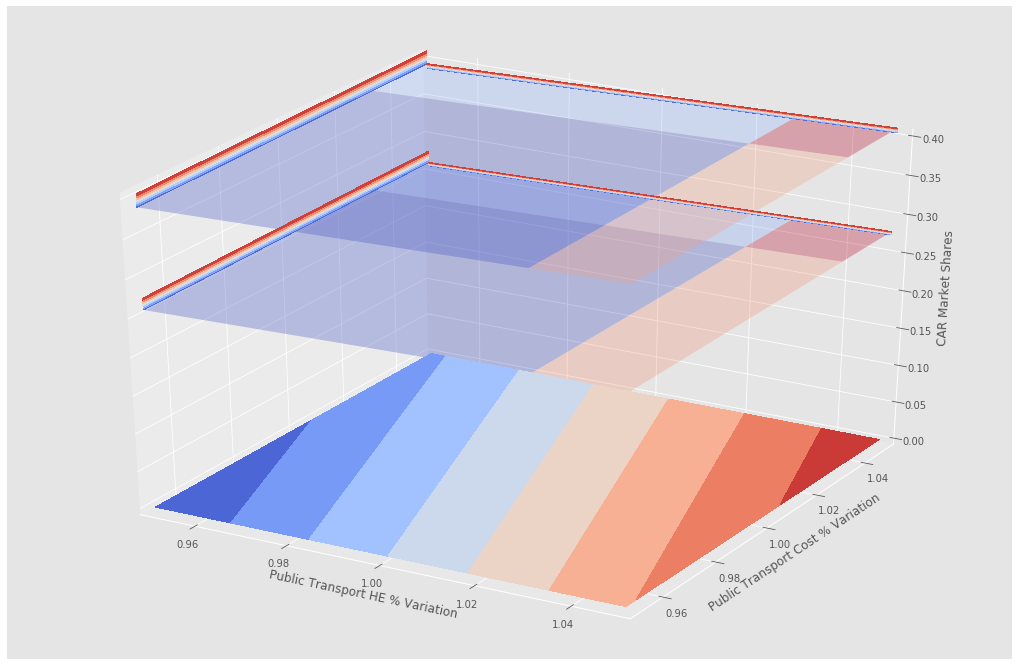

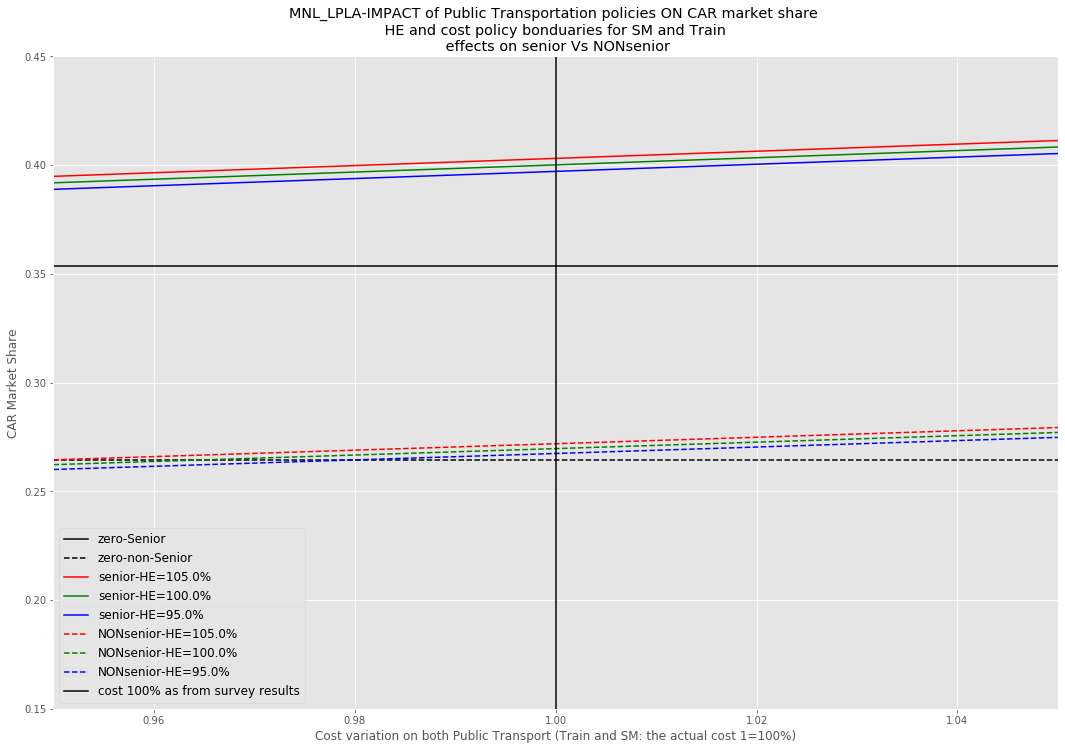

## MNL-Segmentation-2

0 (2835, 48)
(1, 121)
1 (7857, 48)
(1, 121)


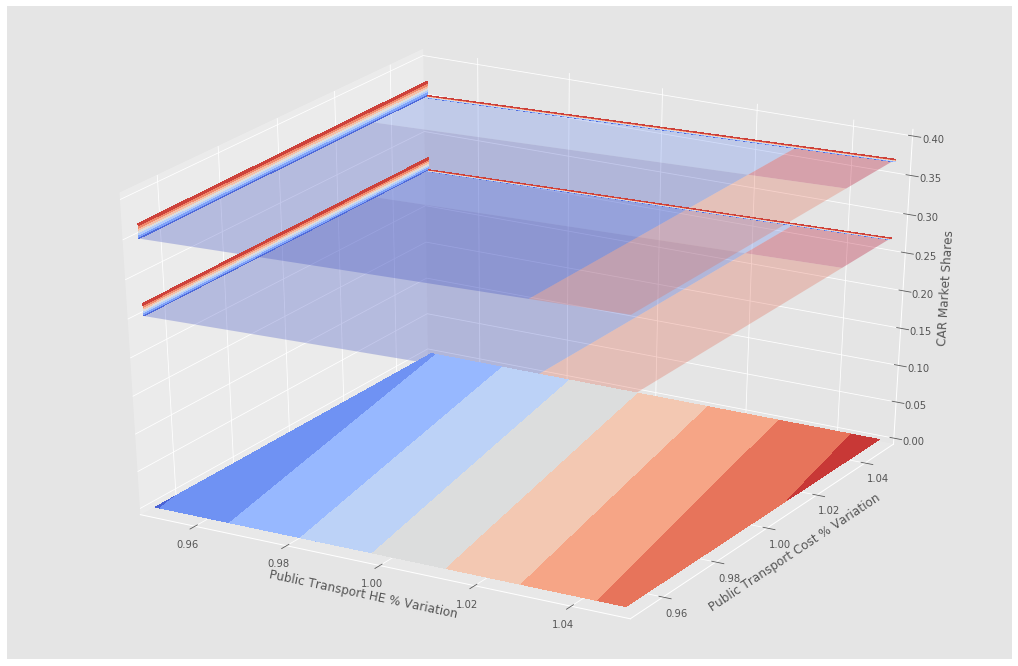

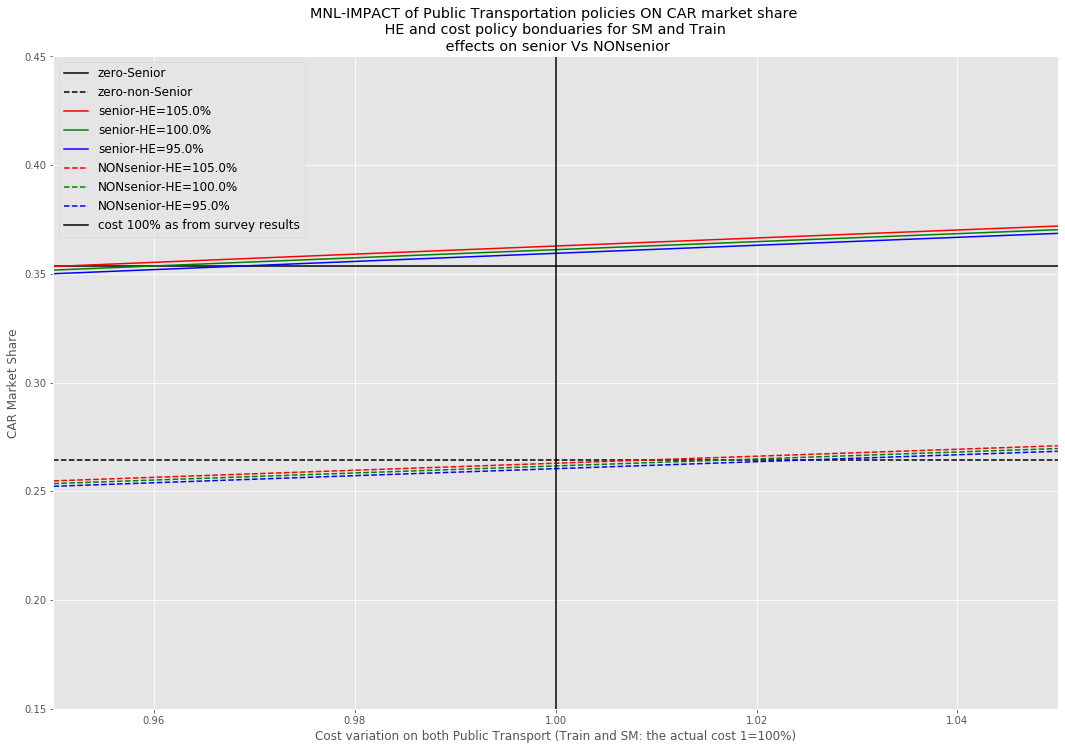

## MMNLnoPa-Segmentation-2

0 (2835, 48)
(1, 121)
1 (7857, 48)
(1, 121)


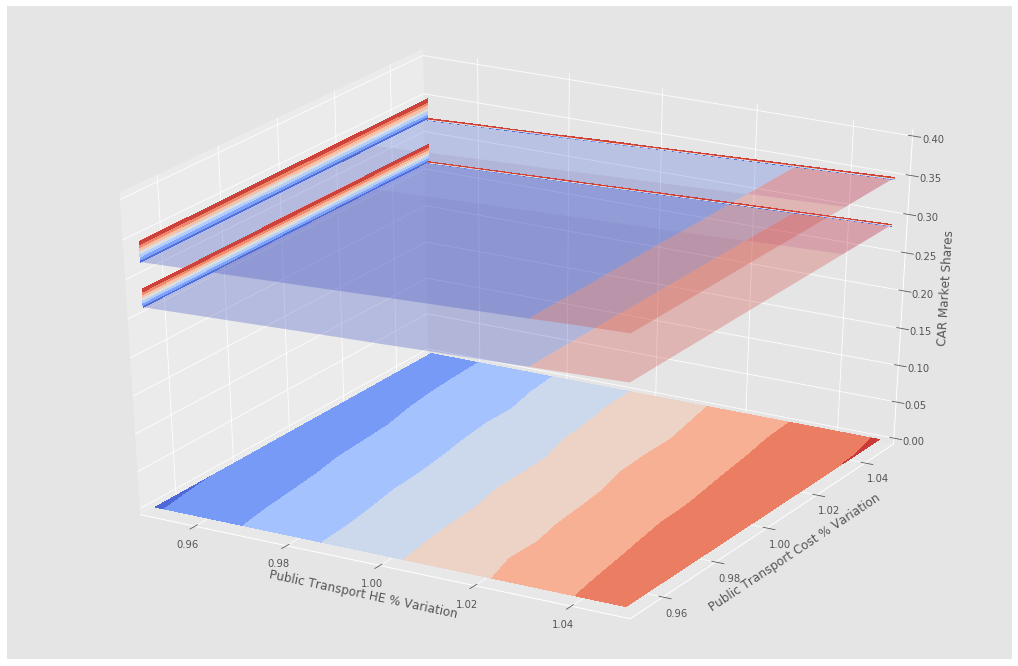

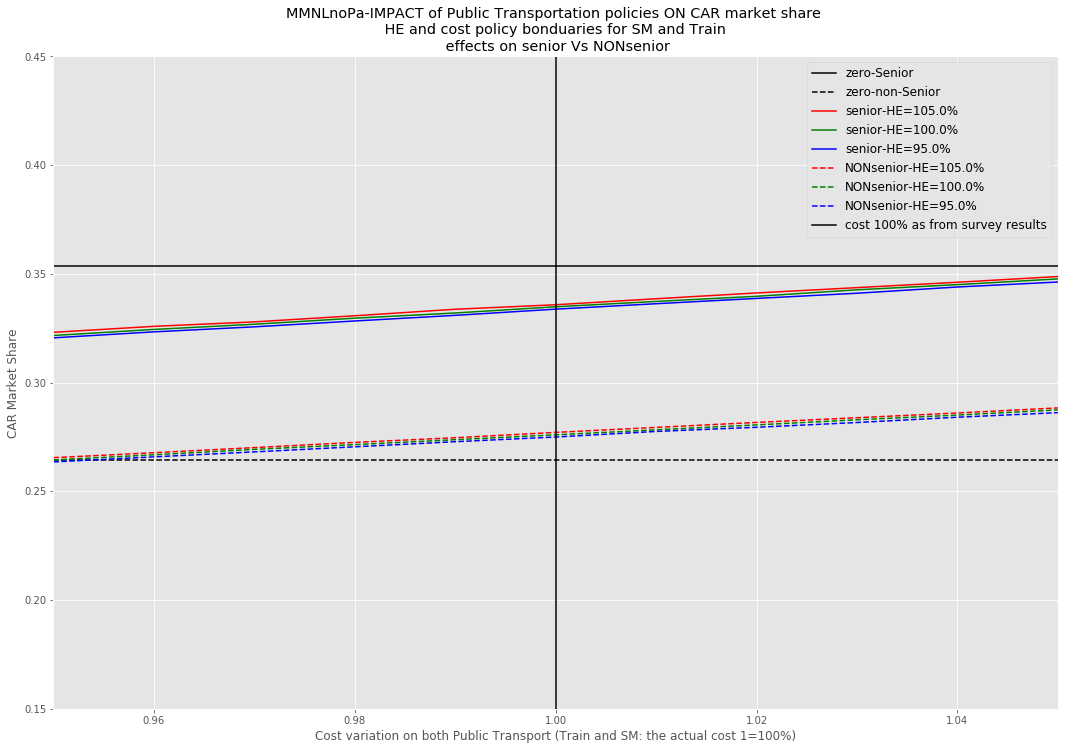

## MMNL-Segmentation-2

0 (2835, 48)
(1, 121)
1 (7857, 48)
(1, 121)


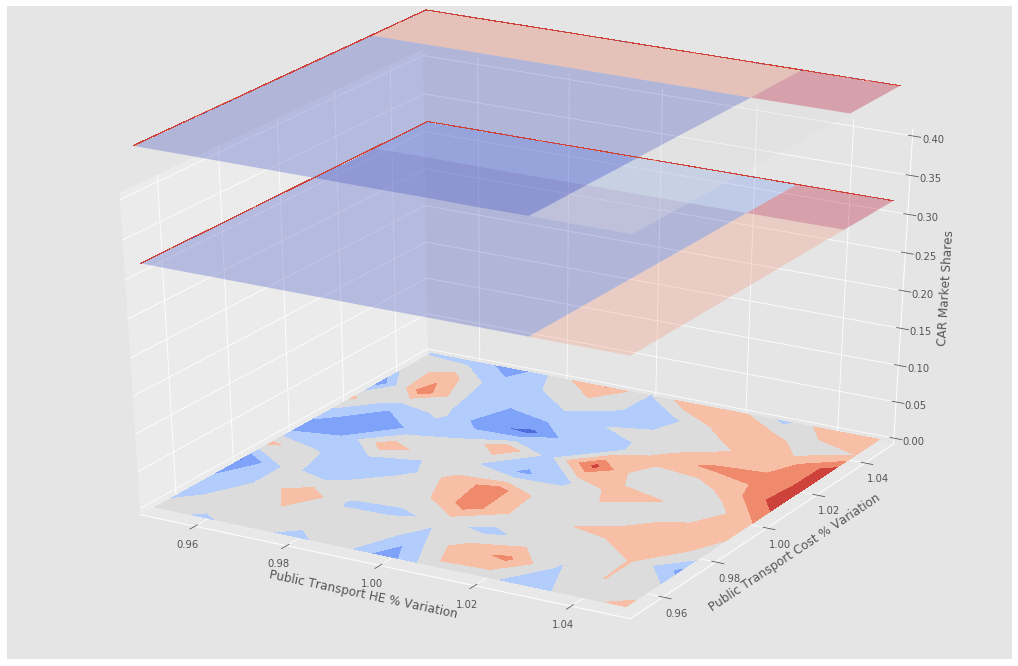

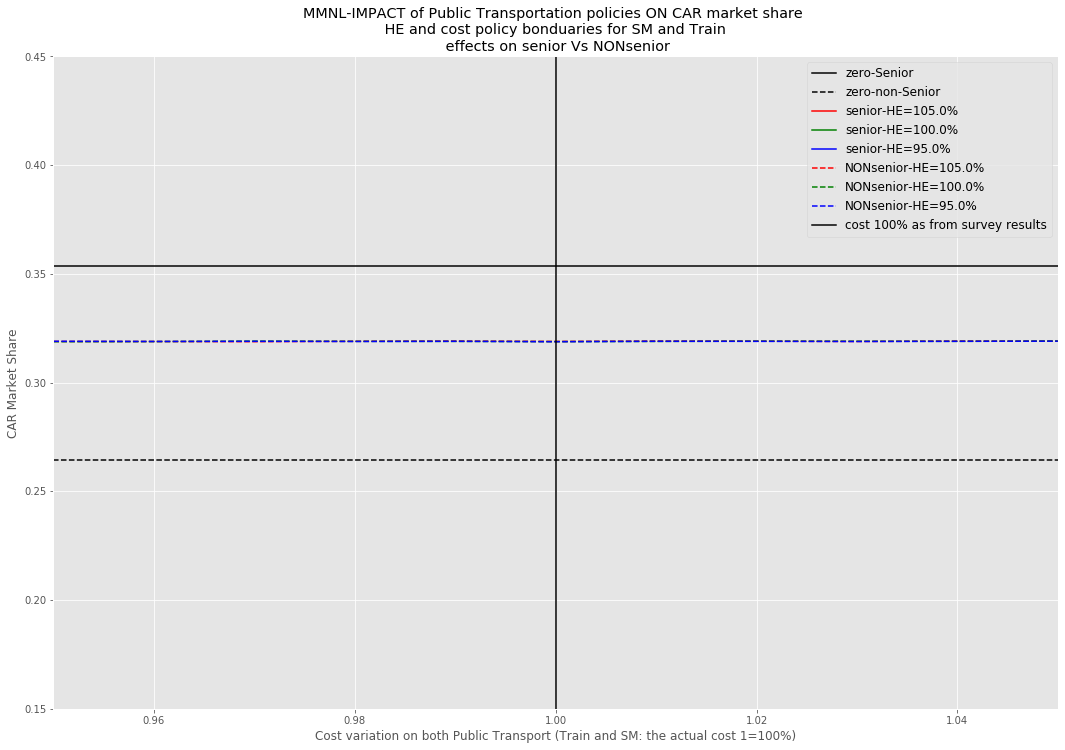

In [15]:
scales = np.arange(0.95,1.05,0.01)
HEs = np.arange(0.95,1.05,0.01)
print(HEs.shape,scales.shape)
draws=1000
for k,segment in enumerate([FULL_dbs,PURPOSE_dbs,AGE_dbs]):
    #print(k, len(segment))
    for i,model in enumerate(ModLabels):
        printStuff=[]
        #print(i,model)        
        display(Markdown(f'## {model}-Segmentation-{k}'))
        for j,group in enumerate(segment):
            print(j,group.data.shape)
            sce=[scenario(model, group, 'CAR', scaleCostPT=s1, scaleCostCAR=1, HE_scale=hhe, draws=draws) for hhe in HEs for s1 in scales]
            print(np.array([sce]).shape)
            printStuff.append(sce)
        plot3Dmarketshares(printStuff, HEs, scales, i,j,k, minMS=0.0, maxMS=0.4,save=True)
        plot2Dmarketshares(printStuff, HEs, scales, i,j,k, minMS=0.15, maxMS=0.45,save=True)

# Value of Headway

In [131]:
display(Latex('$VoH = \\frac{{\\partial V}/{\\partial H}}{{\\partial V}/{\\partial C}}$'))

<IPython.core.display.Latex object>

In [141]:
meanCost = np.stack((database.data['CAR_COST_SCALED'],database.data['SM_COST_SCALED'],database.data['TRAIN_COST_SCALED']),1).mean()

In [142]:
meanCostHE = np.stack((database.data['TRAIN_HE_SCALED'],database.data['SM_HE_SCALED']),1).mean()

In [143]:
display(Latex('$VoH_{MNL_{LPLA}}=\\frac{\\beta_{H}}{\\beta_{C}}$'))

<IPython.core.display.Latex object>

In [144]:
mmod = '../finalModels/ML_1~60.pickle'
res.bioResults(pickleFile=mmod).getBetaValues()['B_HE']\
/res.bioResults(pickleFile=mmod).getBetaValues()['B_COST']

1.5074901754342742

In [145]:
display(Latex('$VoH_{MNL} = \\frac{\\beta_{H}}{q \\cdot \\beta_{C} \\cdot C^{q-1}}$'))

<IPython.core.display.Latex object>

In [146]:
mmod = '../finalModels/ML_2~53.pickle'
res.bioResults(pickleFile=mmod).getBetaValues()['B_HE']\
/res.bioResults(pickleFile=mmod).getBetaValues()['q_COST']\
*res.bioResults(pickleFile=mmod).getBetaValues()['B_COST']\
*meanCost**(res.bioResults(pickleFile=mmod).getBetaValues()['q_COST']-1)

3.337203588592197

In [147]:
display(Latex('$VoH_{MMNL_{noPa}} = \\frac{\\beta_{\\mu_{H}}+\\beta_{\\sigma_{H}} \\cdot u_{H}}{-q_{C} \\cdot e^{(\\beta_{\\mu_{C}}+\\beta_{\\sigma_{C}} \\cdot u_{C})} \\cdot C^{q_{C}-1}}$'))

<IPython.core.display.Latex object>

In [148]:
mmod = '../finalModels/ML_14.pickle'
res.bioResults(pickleFile=mmod).getBetaValues()['BETA_HE_mean_Norm']\
/res.bioResults(pickleFile=mmod).getBetaValues()['q_COST']\
*-np.exp(res.bioResults(pickleFile=mmod).getBetaValues()['BETA_COST_mean'])\
*meanCost**(res.bioResults(pickleFile=mmod).getBetaValues()['q_COST']-1)

7.181463085430472

In [149]:
display(Latex('$VoHE_{MMNL} = \\frac{q_{H} \cdot (\\beta_{\\mu_{H}}+\\beta_{\\sigma_{H}} \\cdot u_{H}) \\cdot H^{q_{H}-1}}{q_{C} \\cdot (\\beta_{\\mu_{C}}+\\beta_{\\sigma_{C} \\cdot u_{C}}) \\cdot C^{q_{C}-1}}$'))

<IPython.core.display.Latex object>

In [150]:
mmod = '../finalModels/ML_16.pickle'
res.bioResults(pickleFile=mmod).getBetaValues()['q_HE']\
*res.bioResults(pickleFile=mmod).getBetaValues()['BETA_HE_mean_Norm']\
*meanCost**(res.bioResults(pickleFile=mmod).getBetaValues()['q_HE']-1)\
/res.bioResults(pickleFile=mmod).getBetaValues()['q_COST']\
*res.bioResults(pickleFile=mmod).getBetaValues()['BETA_COST_mean_Norm']\
*meanCost**(res.bioResults(pickleFile=mmod).getBetaValues()['q_COST']-1)

24.461746836014346